# LBP LOG+trunc method with Rough Sets

In [28]:
import tables
import numpy as np
import json
import os
import pandas as pd
import matplotlib.pyplot as plt
import roughsets_base

# Load PATH variable
with open("config.json", "r") as file:
    config = json.load(file)
DATASETS = config["paths"]["DATASETS"]
DATABASES = config["paths"]["DATABASES"]

## Load HDF5 Dataset

In [29]:
caminho = 'CRD/lbp/nao_normalizado'
nome = "lbp|radius=5|n_points=40|n_samples=3616.hdf5"
dataset = os.path.join(DATASETS, caminho, nome)

hdf5 = tables.open_file(dataset)
dataset_table = hdf5.get_node("/dataset")
data = dataset_table.col("descriptor")
labels = dataset_table.col("label")
hdf5.close()

print(f"Greatest value: {np.max(data)},\nLowest value: {np.min(data)}")

Greatest value: 72822.0,
Lowest value: 62.0


# Histograms

### LBP histogram

<function matplotlib.pyplot.show(close=None, block=None)>

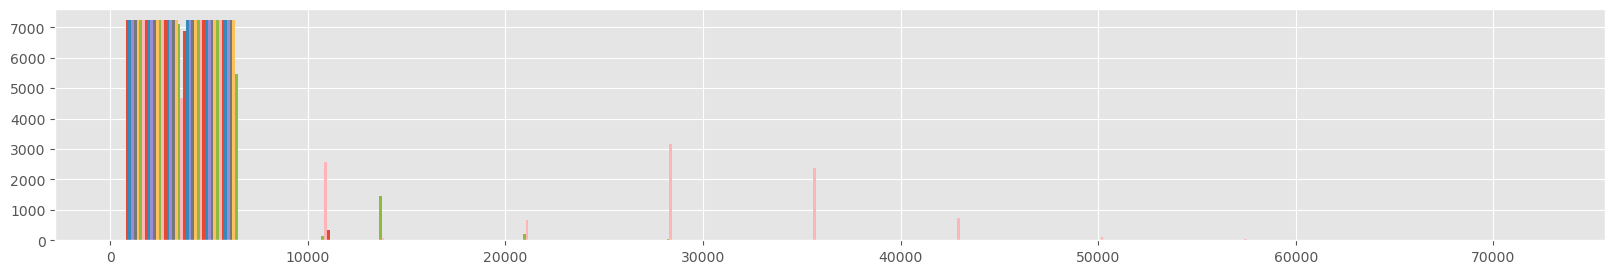

In [30]:
plt.figure(figsize=(20,3))
plt.style.use('ggplot')
plt.hist(data)
plt.show

### LBP's LOG histogram

<function matplotlib.pyplot.show(close=None, block=None)>

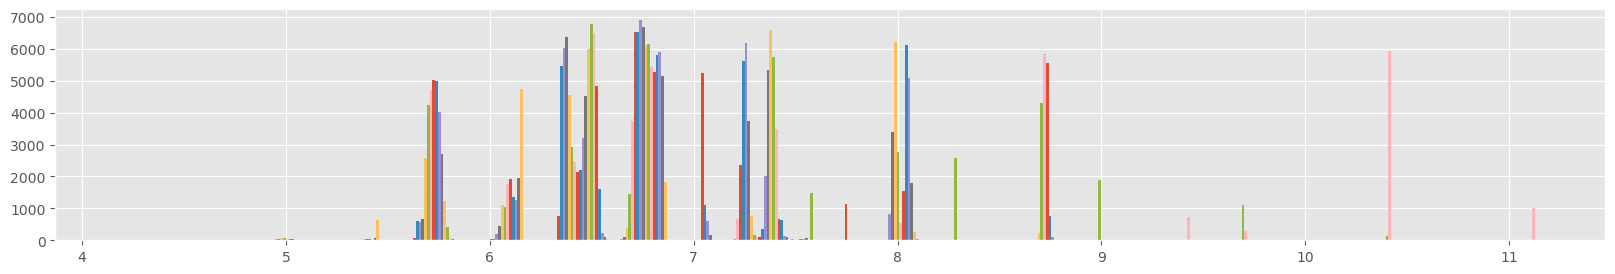

In [31]:
data_log = np.log(data + 1)
plt.figure(figsize=(20,3))
plt.style.use('ggplot')
plt.hist(data_log)
plt.show

### Rough Sets
Truncando os valores do data_log

In [32]:
#df = pd.DataFrame(data_log)
df = pd.DataFrame(np.trunc(data_log).astype(int))
labels_old = labels
labels = pd.Series(labels)
labels.name = "decision"
rs=roughsets_base.RoughSetDT(X=df,y=labels)
positive_region, boundary, upper_aprox, negative_region = rs.get_approximation_indices()
boundary_list = boundary.to_list()
display(df,labels)
print("Boundary Region:")
display(len(boundary_list))

with open("bnd_lista.json", "w", encoding="utf-8") as arquivo:
    json.dump(boundary_list, arquivo, ensure_ascii=False, indent=4)

print("Lista salva em 'bnd_lista.json'")


,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,6,6,5,5,5,5,5,5,5,6,...,6,6,6,6,6,6,6,5,9,9
1,6,5,5,5,5,5,5,5,5,6,...,5,6,5,5,5,5,5,5,8,9
2,7,7,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,8,10
3,6,6,6,6,6,5,6,6,6,6,...,6,6,6,6,6,6,5,5,8,9
4,7,7,7,6,6,6,5,5,5,5,...,6,6,6,6,6,6,6,6,9,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7227,7,6,6,6,6,6,5,6,6,6,...,6,6,6,6,6,6,6,5,8,10
7228,6,6,6,6,6,6,6,6,5,6,...,6,6,6,6,6,6,6,5,6,10
7229,7,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,8,10
7230,7,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,5,8,9


0        b'COVID'
1        b'COVID'
2        b'COVID'
3        b'COVID'
4        b'COVID'
          ...    
7227    b'NORMAL'
7228    b'NORMAL'
7229    b'NORMAL'
7230    b'NORMAL'
7231    b'NORMAL'
Name: decision, Length: 7232, dtype: bytes128

Boundary Region:


3542

Lista salva em 'bnd_lista.json'


# 3 way decision

In [33]:
for i in boundary_list:
    labels[i] = "BND"

## Save HDF5 file

In [34]:
print("Feature Vectors")
data_log_np = np.trunc(data_log).astype(int)
display(data_log_np)
file = tables.open_file(os.path.join(DATASETS,f"log_{nome}"), mode='w')

table_desc = {
    'descriptor': tables.Int32Col(shape=data_log_np.shape[1]),
    'label': tables.StringCol(10)
}

tabela = file.create_table('/','dataset', table_desc)

for i in range(len(data_log_np)):
    linha = tabela.row
    linha['descriptor'] = data_log_np[i]
    linha['label'] = labels[i]
    linha.append()

tabela.flush()
file.close()
print("Done!")

Feature Vectors


array([[ 6,  6,  5, ...,  5,  9,  9],
       [ 6,  5,  5, ...,  5,  8,  9],
       [ 7,  7,  6, ...,  6,  8, 10],
       ...,
       [ 7,  6,  6, ...,  6,  8, 10],
       [ 7,  6,  6, ...,  5,  8,  9],
       [ 7,  6,  6, ...,  5,  9, 10]])

Done!
